# (b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data

In [52]:
#build test data and train data for each folder
import os
import pandas as pd
import numpy as np
import warnings
import collections
import warnings
warnings.filterwarnings('ignore')
# Read all data
all_data = dict()
folders = os.listdir("AReM/")
del folders[1]
folders.sort()
for folder in folders:
    if not folder.endswith("pdf"):
        OneFolderData = list()
        files = sorted(os.listdir("AReM/" + folder + "/"), key= lambda x: int(x[7:-4]))
        for file in files:
                column = ["time","avg_rss12", "var_rss12", "avg_rss13", "var_rss13","vg_rss23", "ar_rss23"]
                if file == "dataset4.csv" and folder == "bending2":
                    data = pd.read_csv("AReM/" + folder + "/" + file, skiprows = 5, names = column, delimiter = " ", index_col = False)
                else:
                    data = pd.read_csv("AReM/" + folder + "/" + file, skiprows = 5, names = column,index_col = False)
                OneFolderData.append(data)
        all_data[folder] = OneFolderData

#building test data and train data
train_data_dict = dict()
test_data_dict = dict()

for i, folder in enumerate(all_data.keys()):
    if folder.startswith("bending"): 
        testfile_num = 2
    else: 
        testfile_num = 3
        
    dataset = all_data[folder]
    #test data
    test_data=dataset[:testfile_num]
    #test data
    train_data=dataset[testfile_num:]
    
    # Write into dictionary
    test_data_dict[folder] = test_data
    train_data_dict[folder] = train_data

# (c) Feature Extraction

## i. Research what types of time-domain features are usually used in time seriesclassification and list them (examples are minimum, maximum, mean, etc).


    There is a useful link to understand features of time series classification:

    https://stats.stackexchange.com/questions/50807/features-for-time-series-classification

    Conclusion:

    Some basic features that can be used in time series：
    
        1.Means
        
        2.Standard deviation
        
        3.Skewness, Kurtosis and Higher order moments
        
        4.Maximum and minimum value
        
    Some specific features:
    
        1.Cross-correlation and Auto-correlation
        
        2.Orders of the autoregressive (AR), integrated (I) and moving average (MA)
        
        3.Parameters of autoregressive and moving average
        


## ii. Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance

In [53]:
import math
#l is the size you want to break,this method can be used in next question
def BreakFeature(dataset,l):
    sample_size=math.ceil(480/l)
    sample=1
    new_feature_values=collections.defaultdict(dict)
    for folder in all_data.keys():
        for i in range(len(dataset[folder])):
            featurenum=1
            startindex=0
            for j in range(l):
                for col_num in range(1,7):
                    if j!=l-1:
                        infor=dataset[folder][i].iloc[startindex:startindex+sample_size,col_num].describe()
                    else:
                        infor=dataset[folder][i].iloc[startindex:,col_num].describe()
                    new_feature_values[sample]["min"+str(featurenum)]=infor["min"]
                    new_feature_values[sample]["max"+str(featurenum)]=infor["max"]
                    new_feature_values[sample]["mean"+str(featurenum)]=infor["mean"]
                    new_feature_values[sample]["std"+str(featurenum)]=infor["std"]
                    new_feature_values[sample]["first quartile"+str(featurenum)]=infor["25%"]
                    new_feature_values[sample]["median"+str(featurenum)]=infor["50%"]
                    new_feature_values[sample]["third quartile"+str(featurenum)]=infor["75%"]
                    featurenum+=1
                startindex = startindex+sample_size
            if folder=="bending1" or folder=="bending2":
                new_feature_values[sample]["activity"]=1
            else:
                new_feature_values[sample]["activity"]=0
            sample+=1
    return pd.DataFrame(new_feature_values).T

In [54]:
#read all data and calculate these value:
#create a dict to store these value
table=BreakFeature(all_data,1).iloc[:,:-1]
train_table=BreakFeature(train_data_dict,1)
table

480
480


,min1,max1,mean1,std1,first quartile1,median1,third quartile1,min2,max2,mean2,...,first quartile5,median5,third quartile5,min6,max6,mean6,std6,first quartile6,median6,third quartile6
1,37.25,45.00,40.624792,1.476967,39.25,40.50,42.0000,0.0,1.30,0.358604,...,33.0000,35.00,36.00,0.00,1.92,0.570583,0.582915,0.0000,0.43,1.3000
2,38.00,45.67,42.812812,1.435550,42.00,42.50,43.6700,0.0,1.22,0.372437,...,32.0000,33.00,34.50,0.00,3.11,0.571083,0.601010,0.0000,0.43,1.3000
3,35.00,47.40,43.954500,1.558835,43.00,44.33,45.0000,0.0,1.70,0.426250,...,35.3625,36.00,36.50,0.00,1.79,0.493292,0.513506,0.0000,0.43,0.9400
4,33.00,47.75,42.179812,3.670666,39.15,43.50,45.0000,0.0,3.00,0.696042,...,30.4575,35.00,36.33,0.00,2.18,0.613521,0.524317,0.0000,0.50,1.0000
5,33.00,45.75,41.678063,2.243490,41.33,41.75,42.7500,0.0,2.83,0.535979,...,28.4575,30.00,31.25,0.00,1.79,0.383292,0.389164,0.0000,0.43,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,19.50,45.33,33.586875,4.650935,30.25,34.25,37.0000,0.0,14.67,4.576562,...,13.7300,16.00,18.25,0.00,8.32,3.259729,1.640243,2.0500,3.11,4.3225
85,19.75,45.50,34.322750,4.752477,31.00,35.25,38.0000,0.0,13.47,4.456333,...,13.5000,15.75,17.75,0.00,9.67,3.432563,1.732727,2.1575,3.20,4.5650
86,19.50,46.00,34.546229,4.842294,31.25,35.25,37.8125,0.0,12.47,4.371958,...,14.0000,15.75,17.75,0.00,10.00,3.338125,1.656742,2.1600,3.08,4.3350
87,23.50,46.25,34.873229,4.531720,31.75,35.25,38.2500,0.0,14.82,4.380583,...,13.7500,16.00,18.00,0.00,9.51,3.424646,1.690960,2.1700,3.27,4.5000


## iii. Estimate the standard deviation of each of the time-domain features you extracted from the data.

In [55]:
feature_std_value=collections.defaultdict(dict)
for feature in table.columns:
    feature_std_value[feature]["std"]=round(table[feature].std(),3)
std_value_table=pd.DataFrame(feature_std_value).T
std_value_table

,std
min1,9.570
max1,4.394
mean1,5.336
std1,1.772
first quartile1,6.154
median1,5.440
third quartile1,5.139
min2,0.000
max2,5.063
mean2,1.574


## Then, use Python's bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [56]:
import numpy as np
import scipy as sp
import scipy.stats

#calculate confidence interval
def std_confidence_interval(data, confidence):
    a = np.array(data)
    n = len(a)
    m, se = np.std(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2, n-1)
    return round(m,3), (round(m-h,3),round(m+h,3))

interval=collections.defaultdict(dict)
for feature in table.columns:
    std, confidence_interval=std_confidence_interval(table[feature],0.9)
    interval[feature]["std"]=std
    interval[feature]["confidence_interval"]=confidence_interval
    
interval_df=pd.DataFrame(interval).T
interval_df

,std,confidence_interval
min1,9.515,"(7.819, 11.212)"
max1,4.369,"(3.591, 5.148)"
mean1,5.305,"(4.36, 6.251)"
std1,1.762,"(1.448, 2.076)"
first quartile1,6.119,"(5.028, 7.209)"
median1,5.409,"(4.445, 6.373)"
third quartile1,5.11,"(4.199, 6.02)"
min2,0,"(0.0, 0.0)"
max2,5.034,"(4.137, 5.931)"
mean2,1.565,"(1.286, 1.844)"


## iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

    First of all, I prefer to choose std as the most important feature, beacuse it show us the degree of dispersion of data.
    
    Then, I want to choose the mean value as the important feature, because it will be helpful for us to find some outliers.

    Finally, I choose the maximum as the third most important feature, because the std minimum are always too large or too small, it means that the value of muimum is unstable. I think the maximum might be more useful and convincing.


# (d) Binary Classification Using Logistic Regression

## i. Assume that you want to use the training set to classify bending from otheractivities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
#1.0 means bending activity, 0.0 means other activities
train=train_table[['mean1','std1','max1', 'mean2', 'std2',
                   'max2', 'mean6', 'std6','max6', 'activity']]
train

,mean1,std1,max1,mean2,std2,max2,mean6,std6,max6,activity
1,43.954500,1.558835,47.40,0.426250,0.338690,1.70,0.493292,0.513506,1.79,1.0
2,42.179812,3.670666,47.75,0.696042,0.630860,3.00,0.613521,0.524317,2.18,1.0
3,41.678063,2.243490,45.75,0.535979,0.405469,2.83,0.383292,0.389164,1.79,1.0
4,43.454958,1.386098,48.00,0.378083,0.315566,1.58,0.679646,0.622534,5.26,1.0
5,43.969125,1.618364,48.00,0.413125,0.263111,1.50,0.555312,0.487826,2.96,1.0
...,...,...,...,...,...,...,...,...,...,...
65,33.586875,4.650935,45.33,4.576562,2.461077,14.67,3.259729,1.640243,8.32,0.0
66,34.322750,4.752477,45.50,4.456333,2.599284,13.47,3.432563,1.732727,9.67,0.0
67,34.546229,4.842294,46.00,4.371958,2.360448,12.47,3.338125,1.656742,10.00,0.0
68,34.873229,4.531720,46.25,4.380583,2.435437,14.82,3.424646,1.690960,9.51,0.0


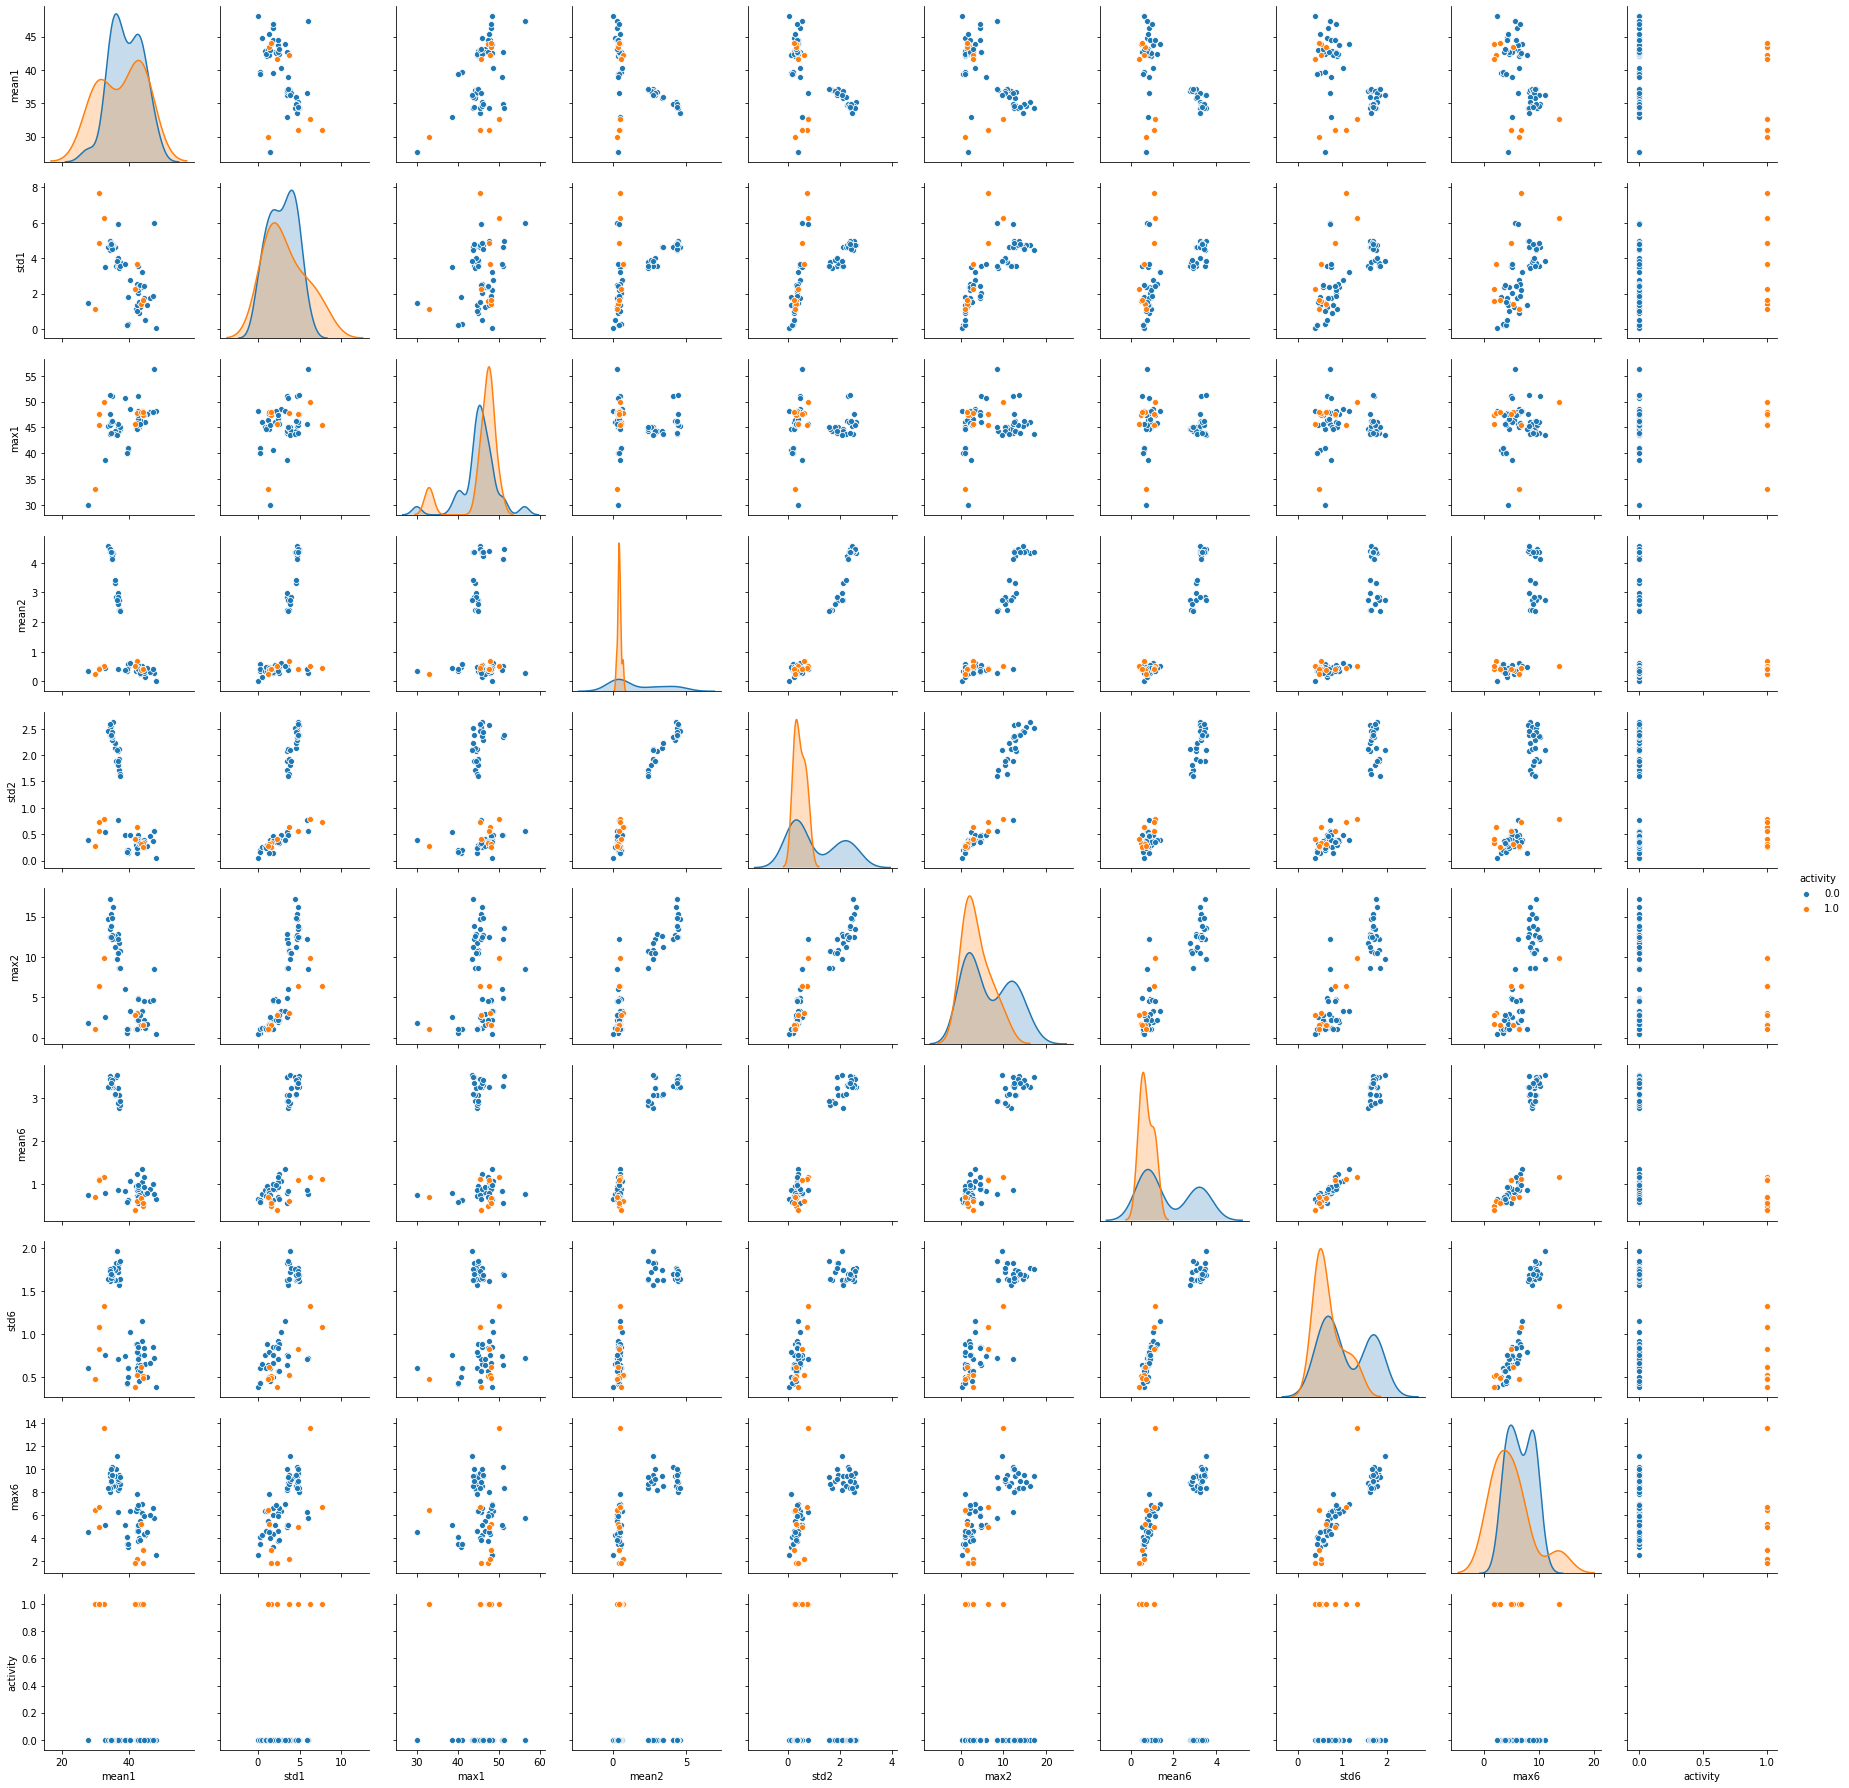

In [150]:
#put all features in one scatterplot
#1.0 means bending activity, 0.0 means other activities
sns.pairplot(train,hue="activity")

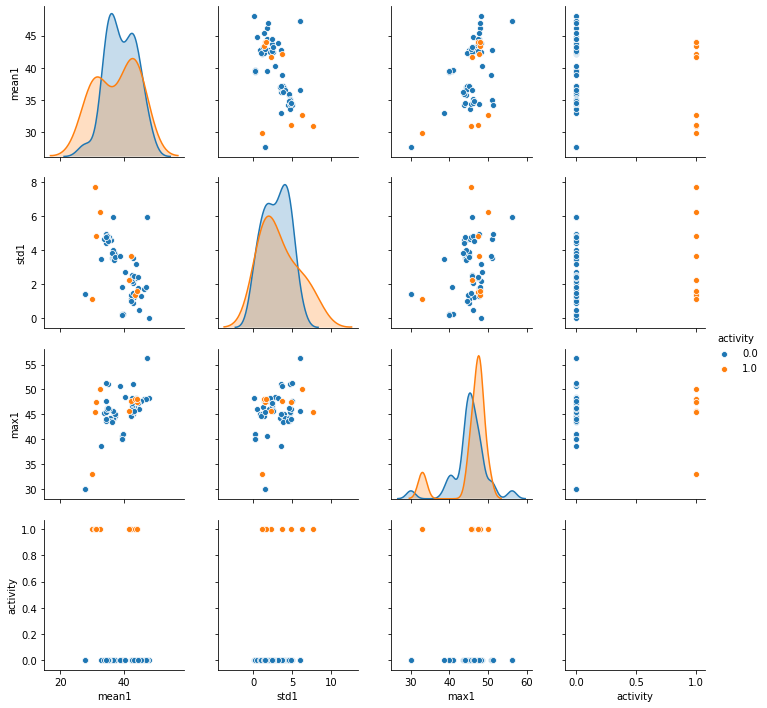

In [58]:
#plot of time serise1:avg_rss12
sns.pairplot(train[['mean1', 'std1', 'max1','activity']] , hue="activity")

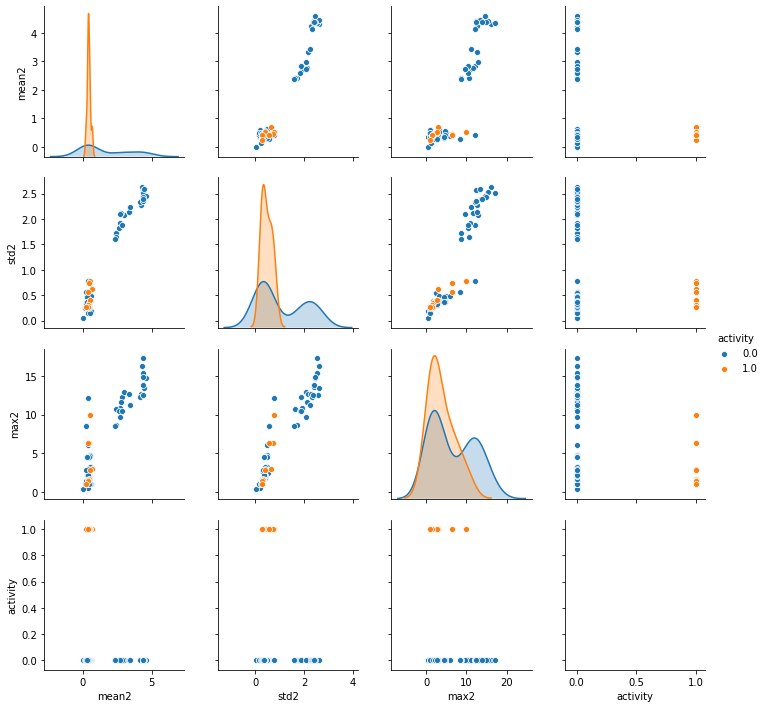

In [59]:
#plot of time serise2:var_rss12
sns.pairplot(train[['mean2', 'std2', 'max2','activity']] , hue="activity")

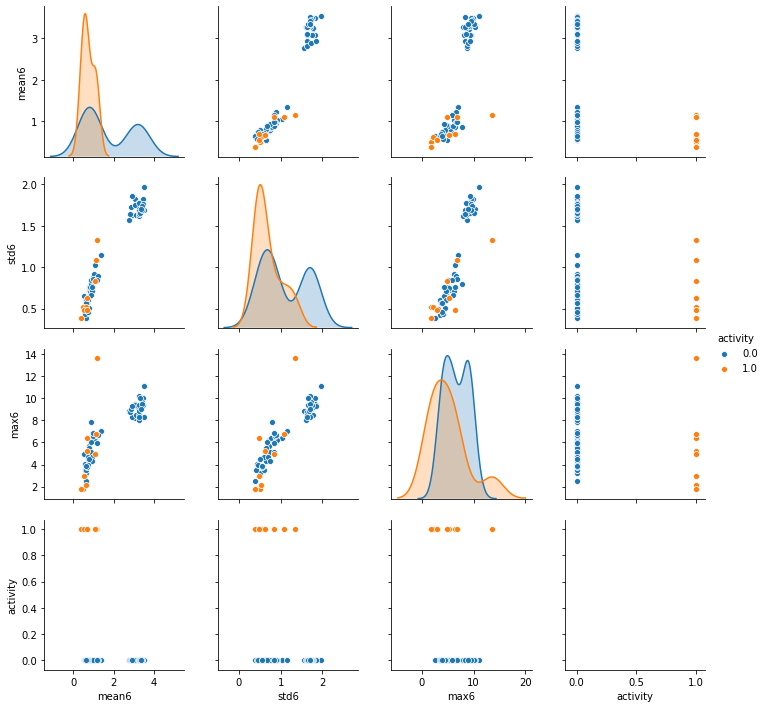

In [60]:
#plot of time serise6:ar_rss23
sns.pairplot(train[['mean6', 'std6', 'max6','activity']] , hue="activity")

## ii. Break each time series in your training set into two (approximately) equal length time series

In [61]:
split2_feature_table=BreakFeature(train_data_dict,2)
split2_feature_table

240


,min1,max1,mean1,std1,first quartile1,median1,third quartile1,min2,max2,mean2,...,median11,third quartile11,min12,max12,mean12,std12,first quartile12,median12,third quartile12,activity
1,36.50,46.50,44.057167,1.556971,43.2500,44.500,45.0000,0.0,1.50,0.381042,...,36.000,36.2500,0.00,1.50,0.388333,0.478528,0.0000,0.000,0.7100,1.0
2,33.75,47.75,43.278875,3.473355,42.0000,45.000,45.2500,0.0,3.00,0.673292,...,30.415,33.7500,0.00,2.18,0.586083,0.491873,0.0000,0.470,0.8700,1.0
3,33.00,45.75,41.621208,3.118644,39.6525,42.330,44.2500,0.0,2.83,0.623083,...,29.750,30.5625,0.00,1.50,0.347500,0.363144,0.0000,0.430,0.5000,1.0
4,39.00,48.00,44.117042,1.359836,43.5000,45.000,45.0000,0.0,1.30,0.250042,...,23.250,23.7500,0.00,4.06,0.543875,0.473445,0.4300,0.500,0.7100,1.0
5,36.67,45.00,43.486208,1.281976,42.3300,43.710,44.5000,0.0,1.30,0.378667,...,21.750,23.5000,0.00,2.96,0.585750,0.487918,0.4225,0.500,0.8300,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,19.50,45.00,33.334500,4.874433,29.9375,34.000,36.8125,0.0,11.78,4.408083,...,15.875,18.0625,0.43,8.32,3.290292,1.646023,2.0500,3.155,4.4525,0.0
66,20.33,44.50,34.036750,4.872880,30.7500,34.415,37.7500,0.0,13.47,4.778292,...,15.750,17.7500,0.00,9.67,3.321417,1.758379,2.0500,3.155,4.3950,0.0
67,19.50,43.33,34.033875,4.758757,30.9375,35.000,37.5000,0.0,12.47,4.574625,...,15.000,17.2500,0.00,8.64,3.432208,1.691050,2.1600,3.255,4.5125,0.0
68,24.33,44.00,34.920792,4.272282,32.2500,35.330,37.8125,0.0,14.82,4.177958,...,16.000,18.0625,0.00,9.51,3.418667,1.598536,2.1700,3.350,4.4525,0.0


In [62]:
#print scatter plot
#1.0 means bending activity, 0.0 means other activities
selected_feature=split2_feature_table[['mean1','std1','max1', 'mean2', 'std2',
                   'max2', 'mean12', 'std12', 'max12', 'activity']]
selected_feature

,mean1,std1,max1,mean2,std2,max2,mean12,std12,max12,activity
1,44.057167,1.556971,46.50,0.381042,0.329540,1.50,0.388333,0.478528,1.50,1.0
2,43.278875,3.473355,47.75,0.673292,0.634285,3.00,0.586083,0.491873,2.18,1.0
3,41.621208,3.118644,45.75,0.623083,0.489595,2.83,0.347500,0.363144,1.50,1.0
4,44.117042,1.359836,48.00,0.250042,0.314099,1.30,0.543875,0.473445,4.06,1.0
5,43.486208,1.281976,45.00,0.378667,0.284434,1.30,0.585750,0.487918,2.96,1.0
...,...,...,...,...,...,...,...,...,...,...
65,33.334500,4.874433,45.00,4.408083,2.196206,11.78,3.290292,1.646023,8.32,0.0
66,34.036750,4.872880,44.50,4.778292,2.762730,13.47,3.321417,1.758379,9.67,0.0
67,34.033875,4.758757,43.33,4.574625,2.391804,12.47,3.432208,1.691050,8.64,0.0
68,34.920792,4.272282,44.00,4.177958,2.341763,14.82,3.418667,1.598536,9.51,0.0


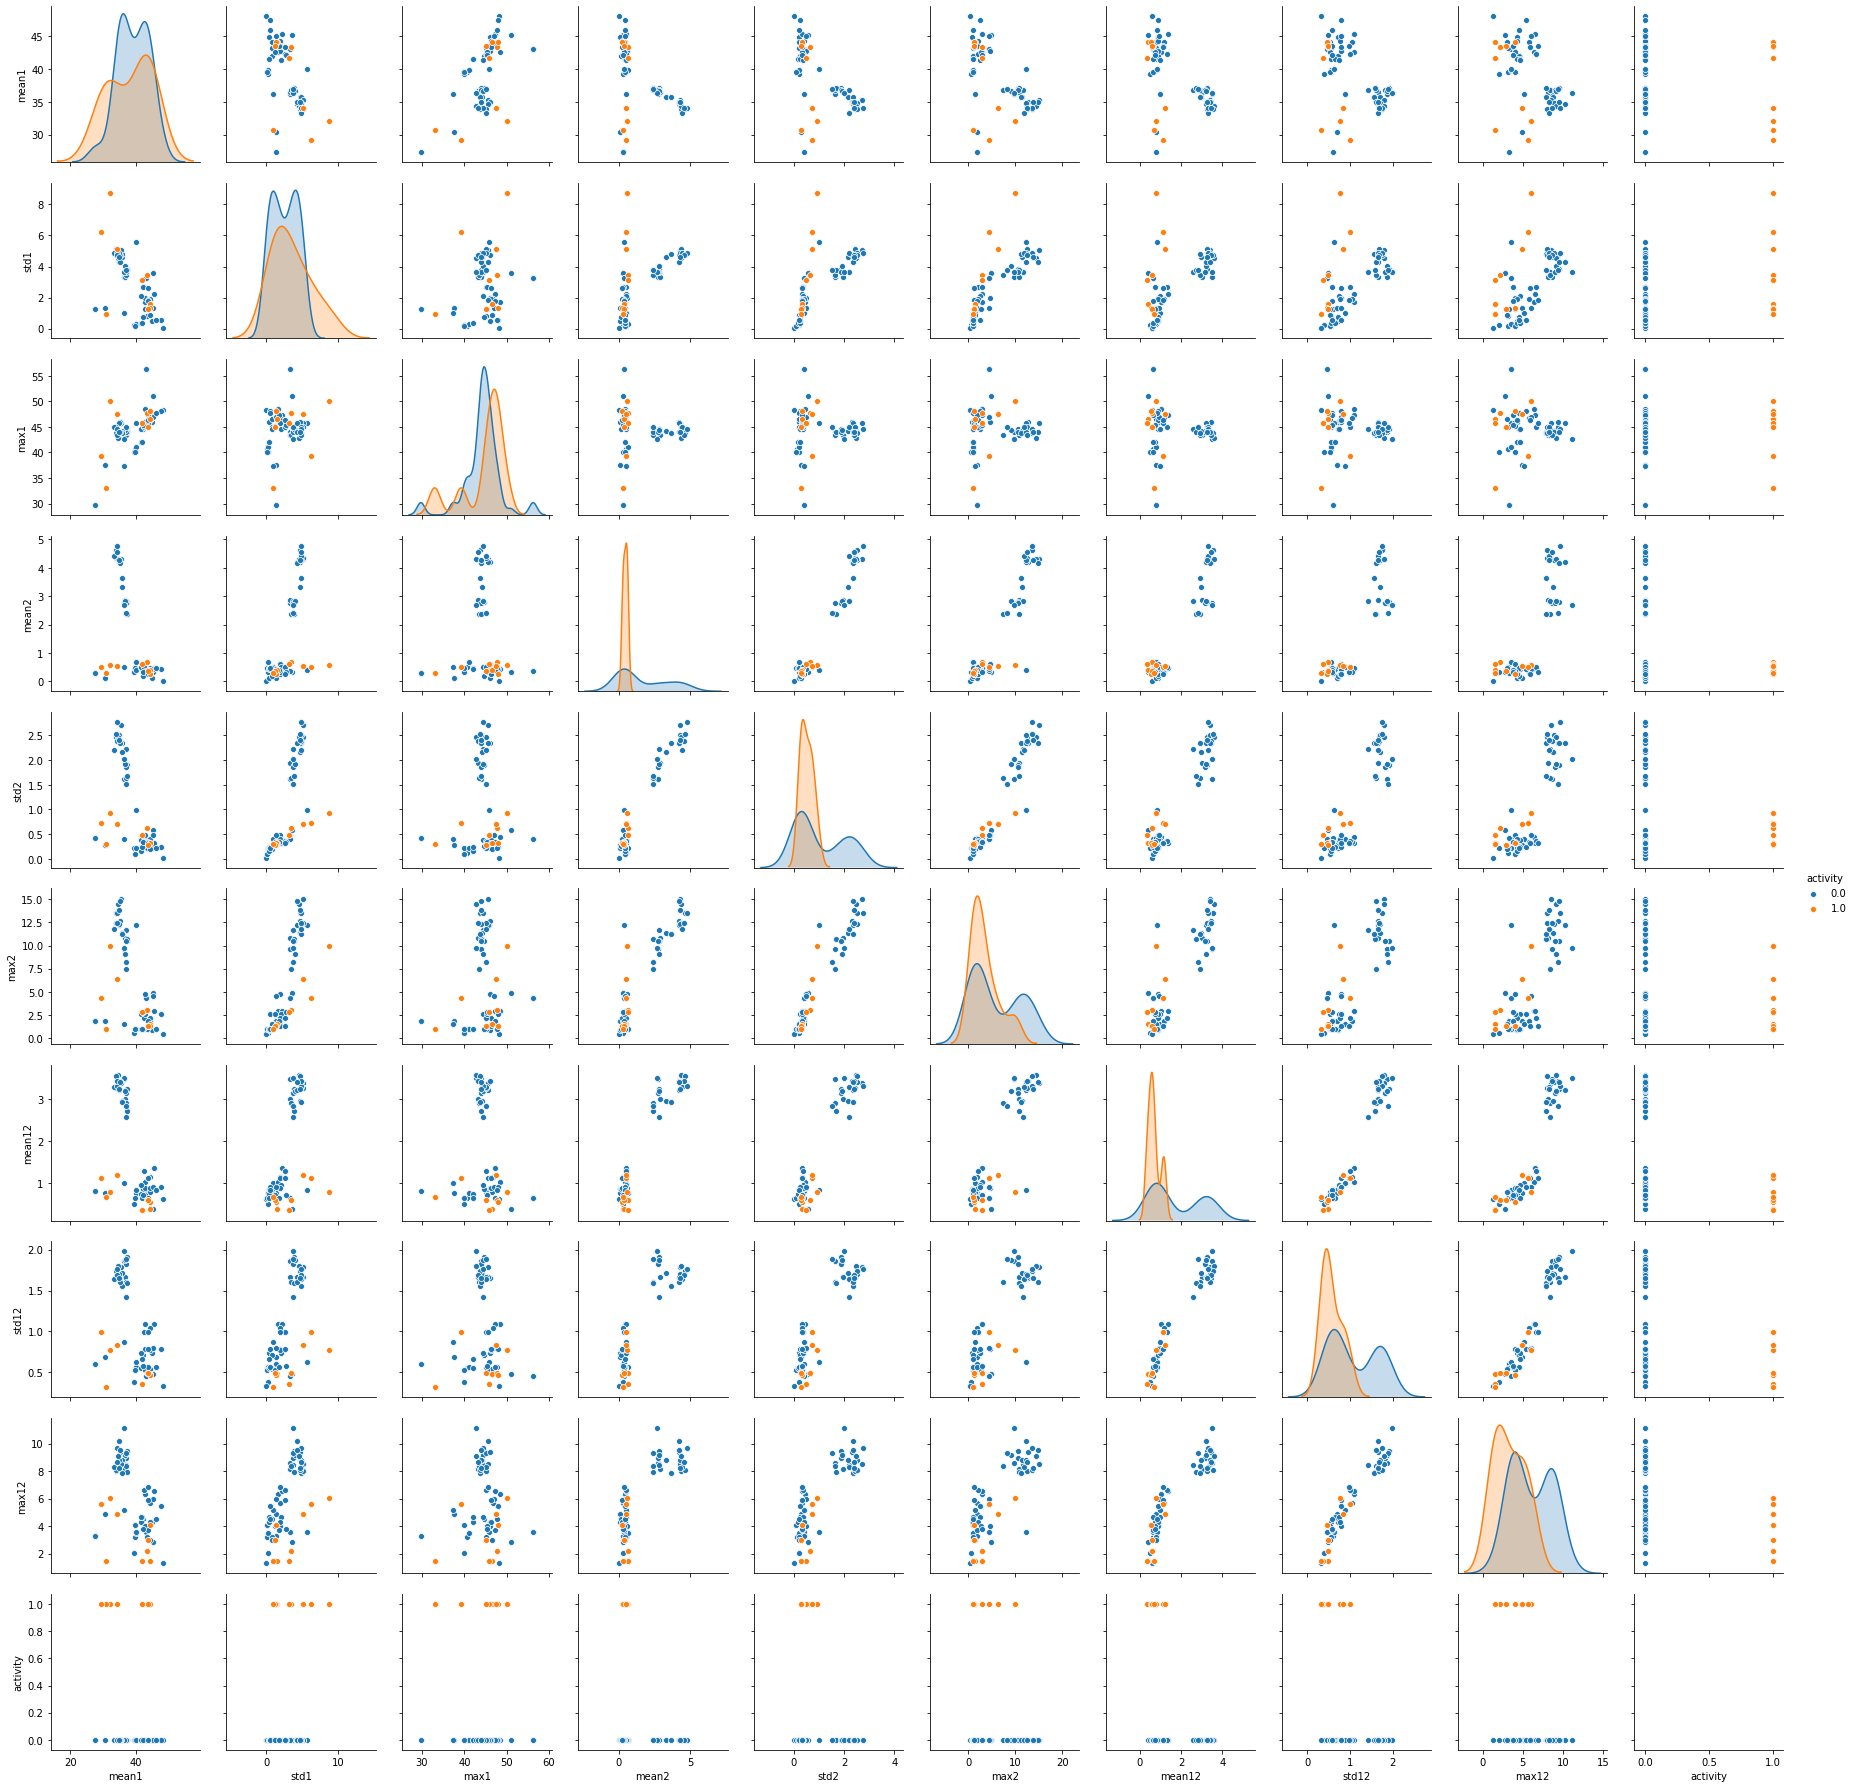

In [151]:
#put all selected features in one scatterplot
#1.0 means bending activity, 0.0 means other activities
sns.pairplot(selected_feature , hue="activity")

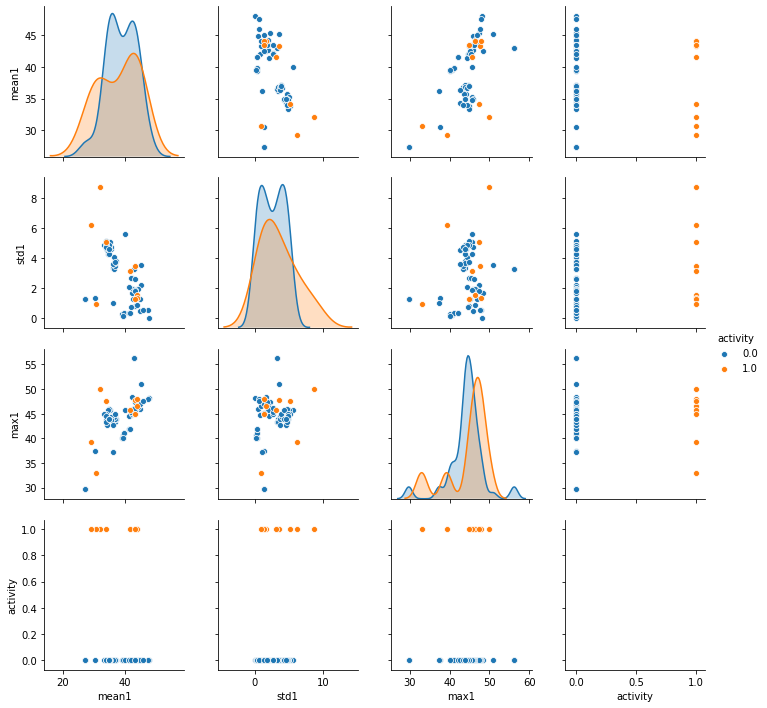

In [63]:
#pairplot of time series 1
sns.pairplot(selected_feature[['mean1', 'std1', 'max1','activity']] , hue="activity")

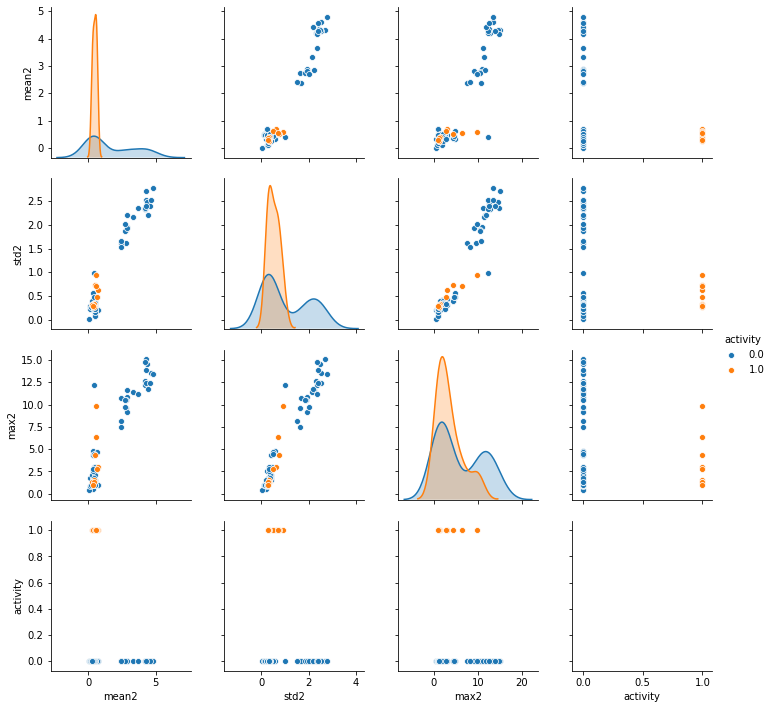

In [64]:
#pairplot of time series 2
sns.pairplot(selected_feature[['mean2', 'std2', 'max2','activity']] , hue="activity")

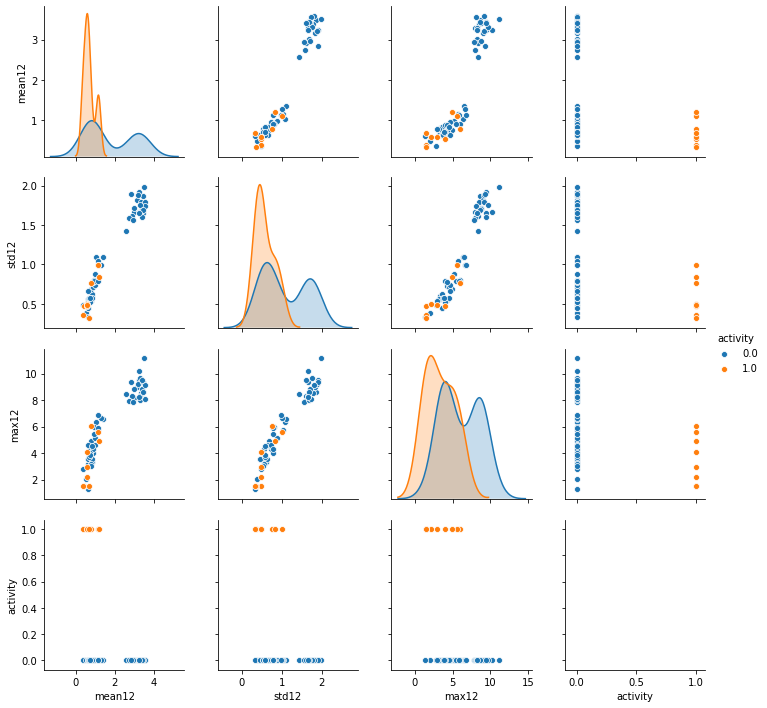

In [65]:
#pairplot of time series 12
sns.pairplot(selected_feature[['mean12', 'std12', 'max12','activity']] , hue="activity")

There is not any significant different between the results of two questions

## iii. Break each time series in your training set into l ∈{1,2,...,20} time series of approximately equal length and use logistic regression to solve the binary classiﬁcation problem

### Cross Validation
Wrong way: Do feature selection before split train and validation datasets

Right way: Do feature selection after split train and validation datasets

In [66]:
# Recursive Feature Elimination 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
import collections
from sklearn.feature_selection import RFECV

In [67]:
def selectFeatures(dataset):# a method to select each mean,std, and max value
    selected_features = []
    for col in dataset.columns:
        if col.startswith('mean') or col.startswith('std') or col.startswith('max'):
            selected_features.append(col)
    x = dataset[selected_features]
    return x

In [68]:
#calculate score for each pair (l,p) ans store score in dict
score_dict=collections.defaultdict(dict)
max_score=0
for l in range(1,21):
    #train dataset for each l
    traindataset = BreakFeature(train_data_dict,l)
    train_x=selectFeatures(traindataset)
    train_y=traindataset.iloc[:,-1]
    model=LogisticRegression()
    rfe = RFECV(model, step=1, cv=5)
    rfe = rfe.fit(train_x, train_y)
    row,p=train_x.iloc[:,rfe.get_support()].shape
    train_score=rfe.score(train_x,train_y)
    F1_score = f1_score(train_y, rfe.predict(train_x))
    max_score=max(max_score,train_score)
    print("current l: ", l, "  best p :", p, "  F1 train score :", F1_score)

480
current l:  1   best p : 5   F1 train score : 1.0
240
current l:  2   best p : 4   F1 train score : 0.9411764705882353
160
current l:  3   best p : 7   F1 train score : 1.0
120
current l:  4   best p : 2   F1 train score : 0.6666666666666667
96
current l:  5   best p : 5   F1 train score : 1.0
80
current l:  6   best p : 11   F1 train score : 1.0
69
current l:  7   best p : 4   F1 train score : 1.0
60
current l:  8   best p : 7   F1 train score : 1.0
54
current l:  9   best p : 7   F1 train score : 1.0
48
current l:  10   best p : 14   F1 train score : 1.0
44
current l:  11   best p : 7   F1 train score : 1.0
40
current l:  12   best p : 17   F1 train score : 1.0
37
current l:  13   best p : 5   F1 train score : 1.0
35
current l:  14   best p : 15   F1 train score : 1.0
32
current l:  15   best p : 18   F1 train score : 1.0
30
current l:  16   best p : 19   F1 train score : 1.0
29
current l:  17   best p : 5   F1 train score : 1.0
27
current l:  18   best p : 4   F1 train score : 1

After running 5-folder CV, we can see that every l can gain the best train accuracy. I prefer to choose the (13,5) as the best (l,p). If p is too large, the model might be overfitting, if l is too large, it will consume too much time to run the model, if l is too small, this model might be unconvincing. Therefore, (13,5) is the most suitable choice.

## iv. Report the confusion matrix and show the ROC and AUC and the parameters of your logistic regression

In [141]:
#use the best (l,p)=(13,5)
best_l,best_p=13,5
traindataset = BreakFeature(train_data_dict,best_l)
train_x=selectFeatures(traindataset)
train_y=traindataset.iloc[:,-1]
model=LogisticRegression()
rfe=RFECV(model,step=1, cv=5)
rfe.fit(train_x,train_y)
#gain features after selecting
pured_train_data_x=train_x.iloc[:,rfe.support_]
pured_train_data_x

37


,max5,mean11,mean23,max49,max55
1,37.50,36.261351,36.779189,45.50,47.40
2,37.25,37.684865,36.290541,44.00,45.00
3,35.25,28.770270,28.382162,42.50,42.00
4,33.50,23.677838,23.855946,43.25,46.50
5,28.50,27.801892,22.513784,44.67,45.00
...,...,...,...,...,...
65,25.00,15.696216,15.071892,41.75,40.75
66,22.00,15.588108,15.051892,41.75,42.67
67,21.33,16.026757,16.425676,45.00,44.00
68,21.50,14.689459,14.740811,46.25,45.33


In [134]:
#calculate confusion matrix, ROC, and AUCD 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

model = LogisticRegression().fit(pured_train_data_x, train_y) 
#choose the score of the class with greater label (class=1)
pred_y_prob = model.predict_proba(pured_train_data_x)[:,1]
pred_y = model.predict(pured_train_data_x) 
#calculate fpr,tpr 
fpr, tpr, thresholds = roc_curve(train_y, pred_y_prob)

cm = confusion_matrix(train_y, pred_y)
cm = pd.DataFrame(cm,index=['Actual False', 'Actual True'],columns=['Predicted False', 'Predicted True'])
cm

,Predicted False,Predicted True
Actual False,60,0
Actual True,0,9


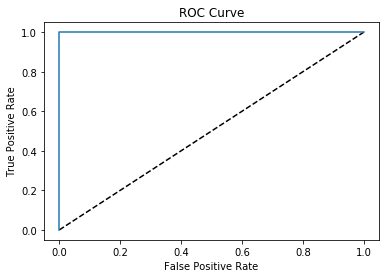

In [135]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [136]:
#calculate AUC score
auc_score = roc_auc_score(train_y, pred_y_prob)
print("AUC score is:", auc_score)

AUC score is: 1.0


In [137]:
#method 2
from sklearn.feature_selection import chi2
coef = model.coef_ 
scores, pvalues = chi2(train_x, train_y)
print("Result: ")
for i, feature in enumerate(pured_train_data_x):
    print("{}: coef is {} and p-value is {}".format(feature, round(coef[0][i],2), round(pvalues[i],4)))

Result: 
max5: coef is 0.31 and p-value is 0.2031
mean11: coef is 0.55 and p-value is 0.5501
mean23: coef is 0.53 and p-value is 0.1874
max49: coef is -0.42 and p-value is 0.0
max55: coef is -0.31 and p-value is 0.0048


## v. Test the classiﬁer on the test set

In [140]:

test_data = BreakFeature(test_data_dict, best_l)
test_x = selectFeatures(test_data)
select_test_x=test_x.iloc[:,rfe.support_]
test_y = test_data['activity']
test_score = model.score(select_test_x, test_y)
print("Accuracy of the test data is: ", round(test_score,3))
print("Cross-validation accuracy of train data is: 1.0")

37
Accuracy of the test data is:  1.0
Cross-validation accuracy of train data is: 1.0


## vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters？

    Through analyze the pairplot of all features, I truely find some data points are well-separated. These data points might cause instability in logisitc regression. If we want to gain a more stable model, we should revise data point by using case-constrol method.

## vii From the confusion matrices you obtained, do you see imbalanced classes?

    There is a imbalance on the confusion matrix

### build a logistic regression model based on case-control sampling and adjust its parameters

In [76]:
from  imblearn.over_sampling import SMOTE

score_dict=collections.defaultdict(dict)
max_score=0
#recursive for each (l,p)
for l in range(1,21):
    #train dataset for each l
    traindataset = BreakFeature(train_data_dict,l)
    train_x=selectFeatures(traindataset)
    train_y=traindataset.iloc[:,-1]
    # use SMOTE to revise train dataset
    sm = SMOTE()
    x, y = sm.fit_resample(train_x, train_y)
    train_x, train_y = pd.DataFrame(x), pd.DataFrame(y)
    model=LogisticRegression()
    rfe = RFECV(model, step=1, cv=5)
    rfe = rfe.fit(train_x, train_y)
    row,p=train_x.iloc[:,rfe.get_support()].shape
    train_score=rfe.score(train_x,train_y)
    F1_score = f1_score(train_y, rfe.predict(train_x))
    print("current l: ", l, "  best p :", p, "  F1 train score :", F1_score)

480
current l:  1   best p : 4   F1 train score : 0.9917355371900827
240
current l:  2   best p : 4   F1 train score : 0.9917355371900827
160
current l:  3   best p : 6   F1 train score : 1.0
120
current l:  4   best p : 3   F1 train score : 0.9917355371900827
96
current l:  5   best p : 4   F1 train score : 1.0
80
current l:  6   best p : 11   F1 train score : 1.0
69
current l:  7   best p : 4   F1 train score : 1.0
60
current l:  8   best p : 7   F1 train score : 1.0
54
current l:  9   best p : 4   F1 train score : 1.0
48
current l:  10   best p : 2   F1 train score : 0.8976377952755905
44
current l:  11   best p : 4   F1 train score : 1.0
40
current l:  12   best p : 6   F1 train score : 1.0
37
current l:  13   best p : 4   F1 train score : 1.0
35
current l:  14   best p : 4   F1 train score : 1.0
32
current l:  15   best p : 8   F1 train score : 1.0
30
current l:  16   best p : 11   F1 train score : 1.0
29
current l:  17   best p : 4   F1 train score : 1.0
27
current l:  18   best 

We can choose the (11,4) as the best (l,p). Because l=11 is not too large and p=4 can avoid overfitting.

In [145]:
#use the best (l,p)=(11,4)
best_l,best_p=11,4
traindataset = BreakFeature(train_data_dict,best_l)
train_x=selectFeatures(traindataset)
train_y=traindataset.iloc[:,-1]
sm = SMOTE()
x, y = sm.fit_resample(train_x, train_y)
train_x, train_y = pd.DataFrame(x), pd.DataFrame(y)
model=LogisticRegression()
rfe=RFECV(model,step=1,cv=5)
rfe.fit(train_x, train_y)
#gain features after selecting
pured_train_data_x=train_x.iloc[:,rfe.support_]
pured_train_data_x

44


,12,31,90,168
0,37.500000,36.318409,46.250000,21.000000
1,38.670000,37.397727,45.750000,26.750000
2,35.250000,28.605909,45.000000,22.750000
3,33.500000,23.509545,45.000000,18.000000
4,28.500000,29.447045,48.000000,18.000000
...,...,...,...,...
115,29.385732,22.578623,34.297544,13.969708
116,34.736621,27.110843,45.000000,21.356543
117,30.227455,30.765931,47.664106,18.575818
118,33.500000,23.477963,40.845007,16.499586


In [147]:
#calculate confusion matrix, ROC, and AUCD 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

model = LogisticRegression().fit(pured_train_data_x, train_y) 
#choose the score of the class with greater label (class=1)
pred_y_prob = model.predict_proba(pured_train_data_x)[:,1]
pred_y = model.predict(pured_train_data_x) 
#calculate fpr,tpr 
fpr, tpr, thresholds = roc_curve(train_y, pred_y_prob)

cm = confusion_matrix(train_y, pred_y)
cm = pd.DataFrame(cm,index=['Actual False', 'Actual True'],columns=['Predicted False', 'Predicted True'])
cm

,Predicted False,Predicted True
Actual False,60,0
Actual True,0,60


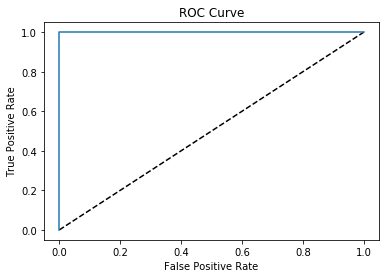

In [148]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [149]:
#calculate AUC score
auc_score = roc_auc_score(train_y, pred_y_prob)
print("AUC score is:", auc_score)

AUC score is: 1.0


# (e) Binary Classiﬁcation Using L1-penalized logistic regression

## i. Repeat 1(d)iii using L1-penalized logistic regression

In [270]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import normalize
clf_model=list()
L1_score=list()
accuracy=list()
for l in range(1,21):
    #train dataset for each l
    traindataset = BreakFeature(train_data_dict,l)
    train_x=selectFeatures(traindataset)
    ## Normalize features
    train_x = normalize(train_x, norm = 'l1')
    train_y=traindataset.iloc[:,-1]
    
    # use SMOTE to revise train dataset
    sm = SMOTE()
    x, y = sm.fit_resample(train_x, train_y)
    train_x, train_y = pd.DataFrame(x), pd.DataFrame(y)
    
    #L1-penalized logistic regression
    clf = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear').fit(train_x, train_y) 
    one_score = f1_score(train_y, clf.predict(train_x))
    L1_score.append(one_score)
    accuracy.append(clf.score(train_x,train_y))
    clf_model.append(clf)

480
240
160
120
96
80
69
60
54
48
44
40
37
35
32
30
29
27
26
24


In [271]:
best_l = np.array(L1_score) == max(L1_score)
best_l_index = [i for i,x in enumerate(best_l) if x]

best_models = {}
for l in best_l_index: 
    best_models[l]=clf_model[l]
#set a ceil to avoid overfitting
lowest_p = 2**31
for l, model in best_models.items():
    features_count = sum(model.coef_[0]!=0)
    if features_count <= lowest_p: 
        lowest_p = features_count
        best_model = model
        best_l = l+1
print("The best l  is {}, the best \
p associated with this model is {}".format(best_l, lowest_p))

The best l  is 3, the best p associated with this model is 3


## ii. Compare the L1-penalized with variable selection using p-values

In [272]:
test_data = BreakFeature(test_data_dict, best_l)
test_x = selectFeatures(test_data)
test_x = normalize(test_x, norm = 'l1')
test_y = test_data['activity']
l1_test_accuracy=best_model.score(test_x,test_y)
print("The accuracy of best L1-penalized Model is: ",round(l1_test_accuracy,3))


160
The accuracy of best L1-penalized Model is:  0.947


The accuracy of the best model using L1 penalized is 0.947. However, the best accuracy of the model with variable selection using p-values is 1.0. Based on the result of this dataset, we can make a conclusion that the model with variable selection using p-values is better than the L1-penalized model.

On the other hand, the L1-penalized model is easier to implement than the model with variable selection using p-values. It's faster to run L1-penalized model. If we want to get result quickly, we should choose the L1-penalized model.

# (f) Multi-class Classiﬁcation (The Realistic Case)

## i. Find the best l in the same way as you found it in 1(e)i

In [194]:
#Multi-calss BreakFeature Function
def BreakFeature_Multi(dataset,l):
    sample_size=math.ceil(480/l)
    sample=0
    new_feature_values=collections.defaultdict(dict)
    for folder in all_data.keys():
        for i in range(len(dataset[folder])):
            featurenum=1
            startindex=0
            for j in range(l):
                for col_num in range(1,7):
                    if j!=l-1:
                        infor=dataset[folder][i].iloc[startindex:startindex+sample_size,col_num].describe()
                    else:
                        infor=dataset[folder][i].iloc[startindex:,col_num].describe()
                    new_feature_values[sample]["min"+str(featurenum)]=infor["min"]
                    new_feature_values[sample]["max"+str(featurenum)]=infor["max"]
                    new_feature_values[sample]["mean"+str(featurenum)]=infor["mean"]
                    new_feature_values[sample]["std"+str(featurenum)]=infor["std"]
                    new_feature_values[sample]["first quartile"+str(featurenum)]=infor["25%"]
                    new_feature_values[sample]["median"+str(featurenum)]=infor["50%"]
                    new_feature_values[sample]["third quartile"+str(featurenum)]=infor["75%"]
                    featurenum+=1
                startindex+=sample_size
            if folder=="bending1" or folder=="bending2":
                new_feature_values[sample]["activity"]="bending"
            else:
                new_feature_values[sample]["activity"]=folder
            sample+=1
    return pd.DataFrame(new_feature_values).T

In [231]:
clf_model=list()
L1_score=list()
accuracy=list()
for l in range(1,21):
    #train dataset for each l
    traindataset = BreakFeature_Multi(train_data_dict,l)
    train_x=selectFeatures(traindataset)
    ## Normalize features
    train_x = normalize(train_x, norm = 'l1')
    train_y=traindataset.iloc[:,-1]
    
    
    #L1-penalized logistic regression for Multi-class
    clf = LogisticRegressionCV(cv=5, penalty='l1',solver='saga', multi_class='multinomial').fit(train_x, train_y)
    one_score = f1_score(train_y, clf.predict(train_x),average="macro")
    L1_score.append(one_score)
    accuracy.append(clf.score(train_x,train_y))
    clf_model.append(clf)

In [232]:
best_l = np.array(L1_score) == max(L1_score)
best_l_index = [i for i,x in enumerate(best_l) if x]

best_models = {}
for l in best_l_index: 
    best_models[l]=clf_model[l]
largest_p = 2**31
for l, model in best_models.items():
    features_count = sum(model.coef_[0]!=0)
    if features_count <= largest_p: 
        lowest_p = features_count
        best_model = model
        best_l = l+1
print("The best l  is {}".format(best_l))

The best l  is 3


In [233]:
test_data = BreakFeature_Multi(test_data_dict, best_l)
test_x = selectFeatures(test_data)
test_x = normalize(test_x, norm = 'l1')
test_y = test_data['activity']
l1_test_accuracy=best_model.score(test_x,test_y)
print("The test accuracy of best L1-penalized Model is: ",round(l1_test_accuracy,3))

The test accuracy of best L1-penalized Model is:  0.789


In [234]:
#confusio Matrix of Multi-class
cm = confusion_matrix(test_y, best_model.predict(test_x))
cm = pd.DataFrame(cm,index=['Actual bending', 'Actual cycling', 'Actual lying', 'Actual sitting', 'Actual standing', 'Actual walking'],
                 columns = ['Predicted bending', 'Predicted cycling', 'Predicted lying', 'Predicted sitting', 'Predicted standing', 'Predited walking'])
cm

,Predicted bending,Predicted cycling,Predicted lying,Predicted sitting,Predicted standing,Predited walking
Actual bending,3,1,0,0,0,0
Actual cycling,0,2,0,0,0,1
Actual lying,0,0,3,0,0,0
Actual sitting,0,0,0,2,1,0
Actual standing,0,0,1,0,2,0
Actual walking,0,0,0,0,0,3


In [235]:
#calculate the probability of the sample for each class in the model
pred_y_prob = best_model.predict_proba(test_x)
prob_bending=[x[0] for x in pred_y_prob]
prob_cycling=[x[1] for x in pred_y_prob]
prob_lying=[x[2] for x in pred_y_prob]
prob_sitting=[x[3] for x in pred_y_prob]
prob_standing=[x[4] for x in pred_y_prob]
prob_walking=[x[5] for x in pred_y_prob]

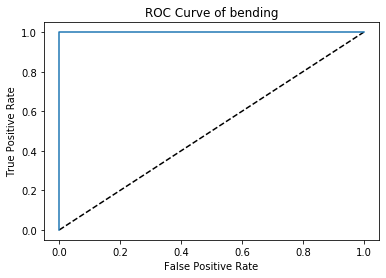

In [236]:
#ROC curve of bending
bending_test_y=test_y.apply(lambda x:1 if x=="bending" else 0)
fpr, tpr, thresholds = roc_curve(bending_test_y, prob_bending)
#plot of bending's ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of bending')
plt.show()

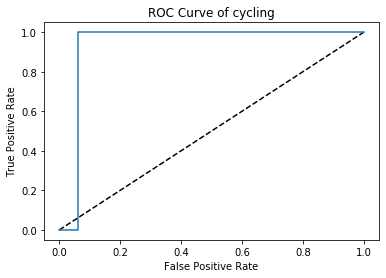

In [237]:
#ROC curve of cycling
cycling_test_y=test_y.apply(lambda x:1 if x=="cycling" else 0)
fpr, tpr, thresholds = roc_curve(cycling_test_y, prob_cycling)
#plot of cycling's ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of cycling')
plt.show()

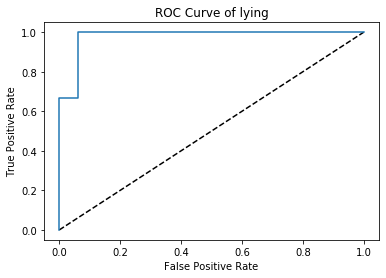

In [238]:
#ROC curve of lying
lying_test_y=test_y.apply(lambda x:1 if x=="lying" else 0)
fpr, tpr, thresholds = roc_curve(lying_test_y, prob_lying)
#plot of lying's ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of lying')
plt.show()

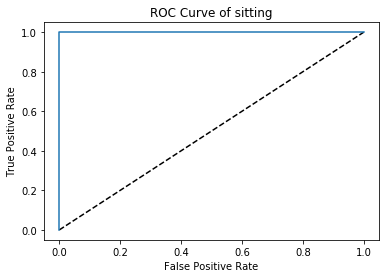

In [239]:
#ROC curve of sitting
sitting_test_y=test_y.apply(lambda x:1 if x=="sitting" else 0)
fpr, tpr, thresholds = roc_curve(sitting_test_y, prob_sitting)
#plot of sitting's ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of sitting')
plt.show()

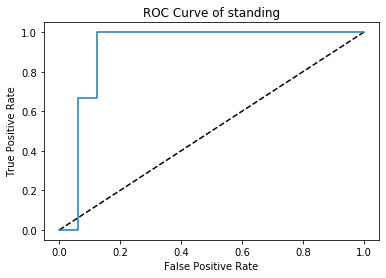

In [240]:
#ROC curve of standing
standing_test_y=test_y.apply(lambda x:1 if x=="standing" else 0)
fpr, tpr, thresholds = roc_curve(standing_test_y, prob_standing)
#plot of standing's ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of standing')
plt.show()

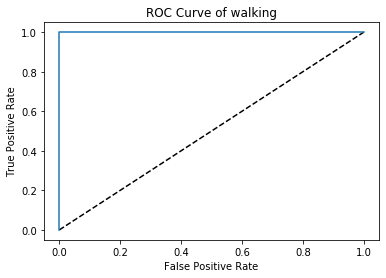

In [241]:
#ROC curve of walking
walking_test_y=test_y.apply(lambda x:1 if x=="walking" else 0)
fpr, tpr, thresholds = roc_curve(walking_test_y, prob_walking)
#plot of walking's ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of walking')
plt.show()

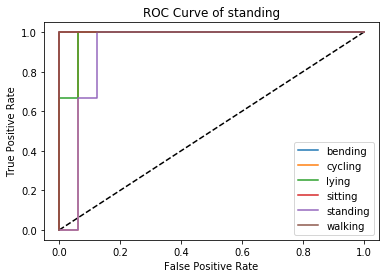

In [242]:
#put all roc in one plot

bending_test_y=test_y.apply(lambda x:1 if x=="bending" else 0)
bendingfpr, bendingtpr, bendingthresholds = roc_curve(bending_test_y, prob_bending)

cycling_test_y=test_y.apply(lambda x:1 if x=="cycling" else 0)
cyclingfpr, cyclingtpr, cyclingthresholds = roc_curve(cycling_test_y, prob_cycling)

lying_test_y=test_y.apply(lambda x:1 if x=="lying" else 0)
lyingfpr, lyingtpr, lyingthresholds = roc_curve(lying_test_y, prob_lying)

sitting_test_y=test_y.apply(lambda x:1 if x=="sitting" else 0)
sittingfpr, sittingtpr, sittingthresholds = roc_curve(sitting_test_y, prob_sitting)

standing_test_y=test_y.apply(lambda x:1 if x=="standing" else 0)
standingfpr, standingtpr, standingthresholds = roc_curve(standing_test_y, prob_standing)

walking_test_y=test_y.apply(lambda x:1 if x=="walking" else 0)
walkingfpr, walkingtpr, walkingthresholds = roc_curve(walking_test_y, prob_walking)

#plot of standing's ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(bendingfpr, bendingtpr, label="bending")
plt.plot(cyclingfpr, cyclingtpr,label="cycling")
plt.plot(lyingfpr, lyingtpr,label="lying")
plt.plot(sittingfpr, sittingtpr,label="sitting")
plt.plot(standingfpr, standingtpr,label="standing")
plt.plot(walkingfpr, walkingtpr,label="walking")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of standing')
plt.legend()
plt.show()

## ii. Repeat 1(f)i using a Na¨ıve Bayes’ classiﬁer

In [243]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

### Multinomial Na¨ıve Bayes’ classiﬁer

In [244]:
MNB_model=list()
MNB_score=list()
accuracy=list()
for l in range(1,21):
    #train dataset for each l
    traindataset = BreakFeature_Multi(train_data_dict,l)
    train_x=selectFeatures(traindataset)
    ## Normalize features
    train_y=traindataset.iloc[:,-1]
    
    
    #L1-penalized logistic regression for Multi-class
    MNB = MultinomialNB().fit(train_x, train_y)
    one_score = f1_score(train_y, MNB.predict(train_x),average="macro")
    MNB_score.append(one_score)
    accuracy.append(MNB.score(train_x,train_y))
    MNB_model.append(MNB)

In [245]:
highest_f1 = max(MNB_score)
best_l = MNB_score[::-1].index(highest_f1)+1
best_model = MNB_model[::-1][best_l-1]
test_data = BreakFeature_Multi(test_data_dict, 21-best_l)
test_x = selectFeatures(test_data)
test_y = test_data['activity']
MNB_test_accuracy=best_model.score(test_x,test_y)
print("The test accuracy of best MNB Model is: ",round(MNB_test_accuracy,3))

The test accuracy of best MNB Model is:  0.947


In [246]:
#confusio Matrix of Multi-class
cm = confusion_matrix(test_y, best_model.predict(test_x))
cm = pd.DataFrame(cm,index=['Actual bending', 'Actual cycling', 'Actual lying', 'Actual sitting', 'Actual standing', 'Actual walking'],
                 columns = ['Predicted bending', 'Predicted cycling', 'Predicted lying', 'Predicted sitting', 'Predicted standing', 'Predited walking'])
cm

,Predicted bending,Predicted cycling,Predicted lying,Predicted sitting,Predicted standing,Predited walking
Actual bending,4,0,0,0,0,0
Actual cycling,0,3,0,0,0,0
Actual lying,0,0,3,0,0,0
Actual sitting,0,0,0,2,1,0
Actual standing,0,0,0,0,3,0
Actual walking,0,0,0,0,0,3


In [247]:
#calculate the probability of the sample for each class in the model
pred_y_prob = best_model.predict_proba(test_x)
prob_bending=[x[0] for x in pred_y_prob]
prob_cycling=[x[1] for x in pred_y_prob]
prob_lying=[x[2] for x in pred_y_prob]
prob_sitting=[x[3] for x in pred_y_prob]
prob_standing=[x[4] for x in pred_y_prob]
prob_walking=[x[5] for x in pred_y_prob]

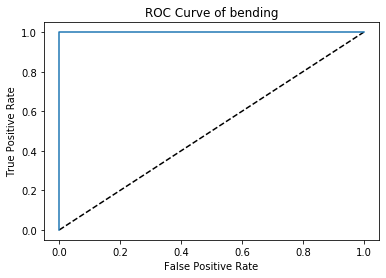

In [248]:
#ROC curve of bending
bending_test_y=test_y.apply(lambda x:1 if x=="bending" else 0)
fpr, tpr, thresholds = roc_curve(bending_test_y, prob_bending)
#plot of bending's ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of bending')
plt.show()

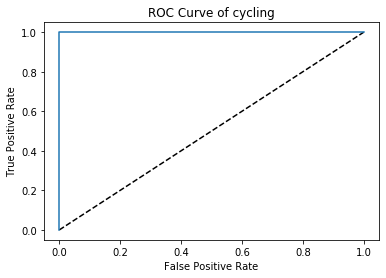

In [249]:
#ROC curve of cycling
cycling_test_y=test_y.apply(lambda x:1 if x=="cycling" else 0)
fpr, tpr, thresholds = roc_curve(cycling_test_y, prob_cycling)
#plot of cycling's ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of cycling')
plt.show()

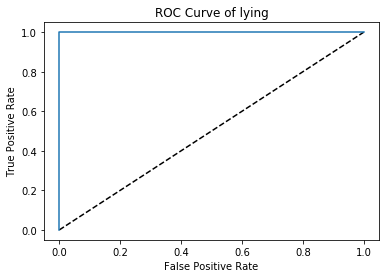

In [250]:
#ROC curve of lying
lying_test_y=test_y.apply(lambda x:1 if x=="lying" else 0)
fpr, tpr, thresholds = roc_curve(lying_test_y, prob_lying)
#plot of lying's ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of lying')
plt.show()

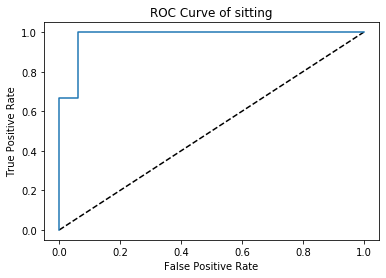

In [251]:
#ROC curve of sitting
sitting_test_y=test_y.apply(lambda x:1 if x=="sitting" else 0)
fpr, tpr, thresholds = roc_curve(sitting_test_y, prob_sitting)
#plot of sitting's ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of sitting')
plt.show()

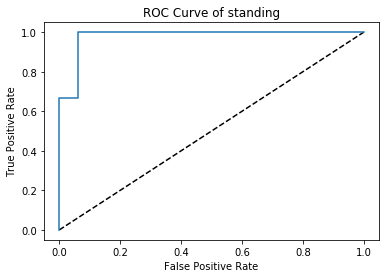

In [252]:
#ROC curve of standing
standing_test_y=test_y.apply(lambda x:1 if x=="standing" else 0)
fpr, tpr, thresholds = roc_curve(standing_test_y, prob_standing)
#plot of standing's ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of standing')
plt.show()

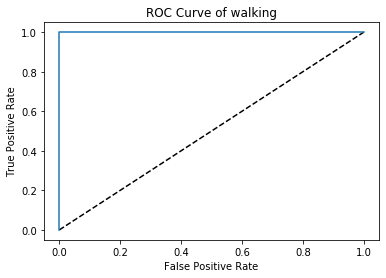

In [253]:
#ROC curve of walking
walking_test_y=test_y.apply(lambda x:1 if x=="walking" else 0)
fpr, tpr, thresholds = roc_curve(walking_test_y, prob_walking)
#plot of walking's ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of walking')
plt.show()

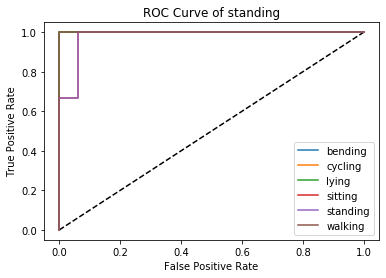

In [254]:
#put all roc in one plot

bending_test_y=test_y.apply(lambda x:1 if x=="bending" else 0)
bendingfpr, bendingtpr, bendingthresholds = roc_curve(bending_test_y, prob_bending)

cycling_test_y=test_y.apply(lambda x:1 if x=="cycling" else 0)
cyclingfpr, cyclingtpr, cyclingthresholds = roc_curve(cycling_test_y, prob_cycling)

lying_test_y=test_y.apply(lambda x:1 if x=="lying" else 0)
lyingfpr, lyingtpr, lyingthresholds = roc_curve(lying_test_y, prob_lying)

sitting_test_y=test_y.apply(lambda x:1 if x=="sitting" else 0)
sittingfpr, sittingtpr, sittingthresholds = roc_curve(sitting_test_y, prob_sitting)

standing_test_y=test_y.apply(lambda x:1 if x=="standing" else 0)
standingfpr, standingtpr, standingthresholds = roc_curve(standing_test_y, prob_standing)

walking_test_y=test_y.apply(lambda x:1 if x=="walking" else 0)
walkingfpr, walkingtpr, walkingthresholds = roc_curve(walking_test_y, prob_walking)

#plot of standing's ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(bendingfpr, bendingtpr, label="bending")
plt.plot(cyclingfpr, cyclingtpr,label="cycling")
plt.plot(lyingfpr, lyingtpr,label="lying")
plt.plot(sittingfpr, sittingtpr,label="sitting")
plt.plot(standingfpr, standingtpr,label="standing")
plt.plot(walkingfpr, walkingtpr,label="walking")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of standing')
plt.legend()
plt.show()

### Gaussian Na¨ıve Bayes’ classiﬁer

In [255]:
GNB_model=list()
GNB_score=list()
accuracy=list()
for l in range(1,21):
    #train dataset for each l
    traindataset = BreakFeature_Multi(train_data_dict,l)
    train_x=selectFeatures(traindataset)
    ## Normalize features
    train_y=traindataset.iloc[:,-1]
    
    
    #L1-penalized logistic regression for Multi-class
    GNB = GaussianNB().fit(train_x, train_y)
    one_score = f1_score(train_y, GNB.predict(train_x),average="macro")
    GNB_score.append(one_score)
    accuracy.append(GNB.score(train_x,train_y))
    GNB_model.append(GNB)

In [256]:
highest_f1 = max(GNB_score)
best_l = GNB_score[::-1].index(highest_f1)+1
best_model = GNB_model[::-1][best_l-1]
test_data = BreakFeature_Multi(test_data_dict, 21-best_l)
test_x = selectFeatures(test_data)
test_y = test_data['activity']
GNB_test_accuracy=best_model.score(test_x,test_y)
print("The test accuracy of best GNB Model is: ",round(GNB_test_accuracy,3))

The test accuracy of best GNB Model is:  0.842


In [257]:
#confusio Matrix of Multi-class
cm = confusion_matrix(test_y, best_model.predict(test_x))
cm = pd.DataFrame(cm,index=['Actual bending', 'Actual cycling', 'Actual lying', 'Actual sitting', 'Actual standing', 'Actual walking'],
                 columns = ['Predicted bending', 'Predicted cycling', 'Predicted lying', 'Predicted sitting', 'Predicted standing', 'Predited walking'])
cm

,Predicted bending,Predicted cycling,Predicted lying,Predicted sitting,Predicted standing,Predited walking
Actual bending,4,0,0,0,0,0
Actual cycling,0,3,0,0,0,0
Actual lying,1,0,2,0,0,0
Actual sitting,0,0,0,2,1,0
Actual standing,0,0,0,1,2,0
Actual walking,0,0,0,0,0,3


In [258]:
#calculate the probability of the sample for each class in the model
pred_y_prob = best_model.predict_proba(test_x)
prob_bending=[x[0] for x in pred_y_prob]
prob_cycling=[x[1] for x in pred_y_prob]
prob_lying=[x[2] for x in pred_y_prob]
prob_sitting=[x[3] for x in pred_y_prob]
prob_standing=[x[4] for x in pred_y_prob]
prob_walking=[x[5] for x in pred_y_prob]

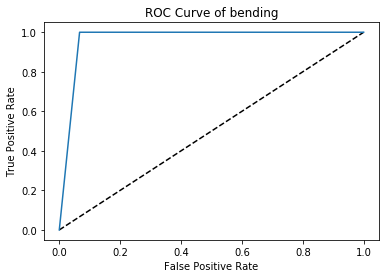

In [259]:
#ROC curve of bending
bending_test_y=test_y.apply(lambda x:1 if x=="bending" else 0)
fpr, tpr, thresholds = roc_curve(bending_test_y, prob_bending)
#plot of bending's ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of bending')
plt.show()

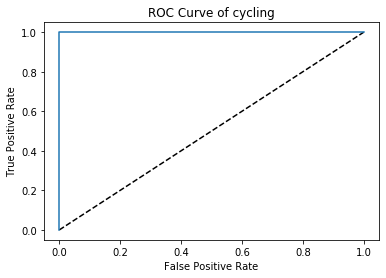

In [260]:
#ROC curve of cycling
cycling_test_y=test_y.apply(lambda x:1 if x=="cycling" else 0)
fpr, tpr, thresholds = roc_curve(cycling_test_y, prob_cycling)
#plot of cycling's ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of cycling')
plt.show()

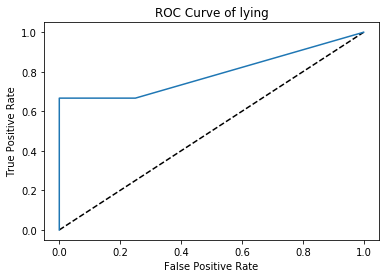

In [261]:
#ROC curve of lying
lying_test_y=test_y.apply(lambda x:1 if x=="lying" else 0)
fpr, tpr, thresholds = roc_curve(lying_test_y, prob_lying)
#plot of lying's ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of lying')
plt.show()

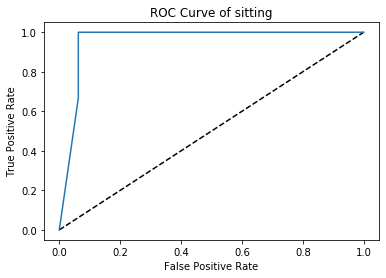

In [262]:
#ROC curve of sitting
sitting_test_y=test_y.apply(lambda x:1 if x=="sitting" else 0)
fpr, tpr, thresholds = roc_curve(sitting_test_y, prob_sitting)
#plot of sitting's ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of sitting')
plt.show()

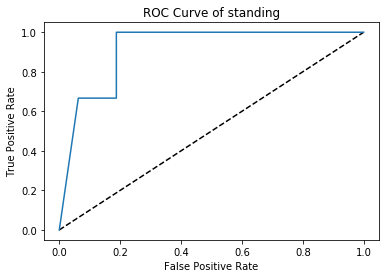

In [263]:
#ROC curve of standing
standing_test_y=test_y.apply(lambda x:1 if x=="standing" else 0)
fpr, tpr, thresholds = roc_curve(standing_test_y, prob_standing)
#plot of standing's ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of standing')
plt.show()

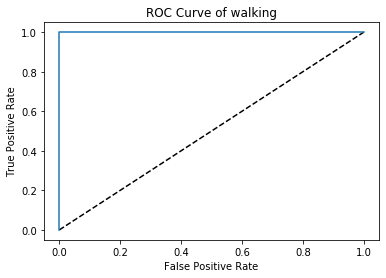

In [264]:
#ROC curve of walking
walking_test_y=test_y.apply(lambda x:1 if x=="walking" else 0)
fpr, tpr, thresholds = roc_curve(walking_test_y, prob_walking)
#plot of walking's ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of walking')
plt.show()

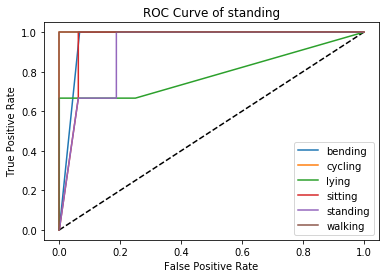

In [265]:
#put all roc in one plot

bending_test_y=test_y.apply(lambda x:1 if x=="bending" else 0)
bendingfpr, bendingtpr, bendingthresholds = roc_curve(bending_test_y, prob_bending)

cycling_test_y=test_y.apply(lambda x:1 if x=="cycling" else 0)
cyclingfpr, cyclingtpr, cyclingthresholds = roc_curve(cycling_test_y, prob_cycling)

lying_test_y=test_y.apply(lambda x:1 if x=="lying" else 0)
lyingfpr, lyingtpr, lyingthresholds = roc_curve(lying_test_y, prob_lying)

sitting_test_y=test_y.apply(lambda x:1 if x=="sitting" else 0)
sittingfpr, sittingtpr, sittingthresholds = roc_curve(sitting_test_y, prob_sitting)

standing_test_y=test_y.apply(lambda x:1 if x=="standing" else 0)
standingfpr, standingtpr, standingthresholds = roc_curve(standing_test_y, prob_standing)

walking_test_y=test_y.apply(lambda x:1 if x=="walking" else 0)
walkingfpr, walkingtpr, walkingthresholds = roc_curve(walking_test_y, prob_walking)

#plot of standing's ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(bendingfpr, bendingtpr, label="bending")
plt.plot(cyclingfpr, cyclingtpr,label="cycling")
plt.plot(lyingfpr, lyingtpr,label="lying")
plt.plot(sittingfpr, sittingtpr,label="sitting")
plt.plot(standingfpr, standingtpr,label="standing")
plt.plot(walkingfpr, walkingtpr,label="walking")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of standing')
plt.legend()
plt.show()

## iii. Which method is better for multi-class classiﬁcation in this problem?

    Through calculate the test accuracy of each model, we can find the best test accuracy of L1-penalized Logistic Regression Model is 0.789. The best test accuracy of Multinomial Na¨ıve Bayes’ classiﬁer Model is 0.947. Then, the best test accuracy of Gaussian Na¨ıve Bayes’ classiﬁer Model is 0.842. Therefore, we can make a conclusion based on this experiment that Multionmial Na¨ıve Bayes’ classiﬁer Model might be the best model when the dataset has multi-class.

# ISLR 3.7.4
    I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then ﬁt a linear regression model to the data, as well as a separate cubic regression, i.e. Y = β0 + β1X + β2X2 + β3X3 

### a. Suppose that the true relationship between X and Y is linear, i.e. Y = β0 + β1X . Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

    answer:

    we would except that the RSS of cubic regression is lower than the RSS of liner regression. The cubic regression always fit the noise of the dataset. Therefore, the training RSS of cubic regrssion should be smaller.

### b. Answer (a) using test rather than training RSS

    answer:

    Because the cubic regression model fit the noise of training data. 

    Although cubic regression model has a lower RSS of training data, it become less fit to test data.
    
    Therefore, the simple linear model will has a lower test RSS.

### c. Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

    answer:

    The cubic regression model will have a lower training RSS. In any conditions, the higher flexiblility model will be more suitable for dataset. Therefore, the cubic regression has a higher flexiblity, it will be closer to training dataset and has a lower RSS.

### d. Answer (c) using test rather than training RSS

    answer:

    Different with training data, in the test data, we cannot decide which model has a lower test RSS. We don't know how far the relationship of X and Y is from linear. If the relationship is closer to linear than cubic. The liner model will have a lower test RSS. On the contrary, the cubic regression model will have a lower test RSS.

# ISLR 4.7.3

    This problem relates to the QDA model, in which the observations within each class are drawn from a normal distribution with a classspeciﬁc mean vector and a class speciﬁc covariance matrix. We consider the simple case where p = 1; i.e. there is only one feature. Suppose that we have K classes, and that if an observation belongs to the kth class then X comes from a one-dimensional normal distribution, X ∼ N(μk,σ2 k). Recall that the density function for the one-dimensional normal distribution is given in (4.11). Prove that in this case, the Bayes’ classiﬁer is not linear. Argue that it is in fact quadratic. Hint: For this problem, you should follow the arguments laid out in Section 4.4.2, but without making the assumption that σ2 1 = ...= σ2 K.

    answer:

    Pk(x)=πk*(1/√2πσk)*e**(-(1/2σk**2)(x-μk)**2)/∑πl*(1/√2πσl)*e**(-(1/2σl**2)(x-μl)**2)

    log(Pk(x))=(logπk)+log(1/√2πσk)-(1/2σk**2)(x-μk)**2)/log(∑πl*(1/√2πσl)*e**(-(1/2σl**2)(x-μl)**2))
    
    =>δ(x)=(logπk)+log(1/√2πσk)-(1/2σk**2)(x-μk)**2)

    Therefore,the Bayes' classifier is in fact quadratic.

# ISLR 4.7.7
    Suppose that we wish to predict whether a given stock will issue a dividend this year (“Yes” or “No”) based on X, last year’s percent proﬁt. We examine a large number of companies and discover that the mean value of X for companies that issued a dividend was ¯ X = 10, while the mean for those that didn’t was ¯ X = 0. In addition, the variance of X for these two sets of companies was ˆ σ2 = 36. Finally, 80% of companies issued dividends. Assuming that X follows a normal distribution, predict the probability that a company will issue a dividend this year given that its percentage proﬁt was X = 4 last year. Hint: Recall that the density function for a normal random variable is f(x)= 1 √2πσ2 e−(x−μ)2/2σ2. You will need to use Bayes’ theorem.

In [123]:
e = np.exp(1)
power2_sigma = 36
pi = np.pi
x,meanyes,meanno=4,10,0
divide_prob=np.power(e,-(x-meanyes)**2/(2*power2_sigma))/np.sqrt(2*pi*power2_sigma)
no_divide_prob = np.power(e, -(x-meanno)** 2 / (2 * power2_sigma)) / np.sqrt(2 * pi * power2_sigma)

prob = 0.8 * divide_prob / (0.8 * divide_prob + 0.2 * no_divide_prob)
print("The probility that a company will issue a dividend this year is : ",round(prob,3))

The probility that a company will issue a dividend this year is :  0.752
